# HCI VISUALIZATION
1. GROUPBY selects the elements and makes group out of it, combines the numeric fields of each specific group
#TODO We could use it grouping for language and looking at how many anime are made in japan, stating it's the first country where the culture of doing (and watching) anime is SO big

2. How the age influences the number of episodes watched?

3. Historical events that may have changed the number of visualization and/or production of animes during the years (e.g. war?)

4. Sunburst stating which countries are anime most produced in and watched (not sure we have this data)

5. Correlation between score and how many times people have rewatched the anime itself?

6. We could we analyze how a missing kanji states something about the character? 1/4 of the characters don't have it. I guess that kanji name is missing for non-Japanese characters and/or for minor characters.

7. GROUPBY using ratings.csv on anime_id and score, checking how many people have put 10 on the anime x, then 9 and so on
df = df.groupby(['anime_id','score']).size().reset_index(name='count')
Show the counts with sns.barplot or also a violinplot
# Do Distribution of ratings percentages of top movies using a violin Plot 


### SOME help from NotebookLM

#### GUIDELINES
La regola fondamentale è evitare la superficialità:
• Evitare l'eccesso di grafici semplici: Se il 97% dei grafici presentati nella sua soluzione sono grafici a torta (P charts) e grafici a barre (bar charts), la soluzione sarà bollata come "Excel" e dovrà rifare l'esame in un altro appello.
• Mostrare l'analisi del set di dati completo: Le visualizzazioni devono supportare la "storia" che sta raccontando e dimostrare un'analisi approfondita dell'intero set di dati di grandi dimensioni. Eviti di restringere l'analisi a un sottoinsieme troppo piccolo e non rappresentativo, come concentrarsi solo sui vincitori degli Oscar.
• Ogni grafico risponde a una domanda: Ogni grafico o visualizzazione dovrebbe idealmente rispondere a una domanda specifica (o a una "domanda di ricerca") all'interno della sua narrazione complessiva.
• Dimostrare competenza negli strumenti avanzati: È essenziale mostrare di saper utilizzare le tecniche di visualizzazione avanzate coperte nel modulo, come quelle fornite da Plotly (ad esempio, scatter plot animati, sunburst, coropleti) e Seaborn (come violin plots o heatmap di correlazione).
FROM HERE: https://www.linkedin.com/pulse/need-advanced-data-visualization-business-krishnadev-pillai/
I add spider and arrow
In sintesi, il "minor numero di grafici" è quello strettamente necessario per sviluppare e supportare la sua storia, garantendo una varietà di tipi di visualizzazione che vadano oltre i semplici grafici a linee o a barre


##### Project Proposal: Anime Data Story and Visualizations
For the anime assignment, the main goal is to use data analysis and visualization to tell a clear and meaningful story ("Telling a Story with Data"). The available dataset is extensive, featuring 130 million data points and 124 million user ratings, along with details on 29,000 anime titles and 210,000 characters. It is essential that the analysis utilizes the entire dataset—the "Big Picture"—rather than focusing on small subsets.
1. Proposed Story: The Evolution of Roles and Tastes in Global Animation
An effective story should link the various relationships within the dataset (Characters, Users, Ratings, and Anime Details).
Central Theme: How have user tastes and the perception of characters (especially regarding gender roles) evolved over time and across different regions?
Key Narrative Points and Analytical Challenges:
1. Preliminary Analysis and Cleaning: It is crucial to clean and analyze the data first. For instance, you must identify how to handle missing character names, properly merge the various tables (e.g., combining user data with ratings and anime details), and normalize country names for geographic analysis.
2. Trends and Popularity: Track the popularity of genres or primary characters over time.
3. Gender Bias: Compare the average ratings (1–10 scale) assigned to female characters versus male characters, or analyze their distribution across key roles.
4. Geographic Impact: Verify if the user's country of origin (which generated 124 million votes) significantly impacts the content they watch or rate highly. This requires geographic analysis, ideally using tools like GeoPandas and Folium.
2. Suggestions for Charts and Visualizations
The visualizations should be powerful, preferably interactive (using Plotly) or specialized (such as Violin Plots and Choropleth Maps).
A. Temporal Trends Analysis
• Chart: Interactive Line Chart (Plotly Express - px.line).
• Details: Plot the evolution of the number of anime produced (or the average number of ratings received) segregated by Genre across the years. Interactivity is key (for instance, the ability to hide lines) to visualize multiple genres without making the chart illegible.
• Objective: Show which genres peaked during specific periods and if these trends correlate with historical or technological events.
B. Distribution Analysis (Rating Bias)
• Chart: Violin Plot or Boxplot.
• Details: Visualize the distribution of average ratings of anime grouped by Genre or Type of Role (e.g., comparing if ratings for female roles are more homogeneous or polarized than male roles).
• Necessary Operations: Use Pandas' groupby() function to group the data and calculate aggregation metrics (like mean or size).
• Objective: Reveal any potential rating bias based on categorical attributes that would be obscured by a simple average.
C. Geographical Analysis (Geographic Impact)
• Chart: Animated Choropleth Map.
• Details: Using GeoPandas and Folium or Plotly, map the average rating (color intensity) or the total quantity of ratings submitted by Country. The country must be mapped using standard codes, such as ISO Alpha.
• Animation: Animate the chart based on the Year to display the expansion of the anime market or how ratings change over different decades.
• Objective: Understand the geographical origin of the largest part of the fanbase and identify regional differences. When overlaying geographical data, it is fundamental to ensure that the Coordinate Reference System (CRS) is correctly aligned between the datasets.

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt

# Set display options
pd.set_option('display.max_columns', None)

# Load Datasets (Assuming files are in the current directory)
# Loading only essential columns for the 'heavy' files to save RAM
anime_details_df = pd.read_csv('datasets/details_cleaned.csv')
profiles_df = pd.read_csv('datasets/profiles_cleaned.csv')
ratings_df = pd.read_csv('datasets/ratings_cleaned.csv', usecols=['username', 'anime_id', 'score']) 

# We convert dates to datetime immediately for time-series analysis
anime_details_df['start_date'] = pd.to_datetime(anime_details_df['start_date'], errors='coerce')
anime_details_df['start_year'] = anime_details_df['start_date'].dt.year

print("Data Loaded Successfully")
print(f"Anime Dataset Shape: {anime_details_df.shape}")

Cleaning Strategy
Before analysis, we address data quality issues:

Missing Years: We drop records without a start year as temporal analysis is crucial to our story.

Genre Parsing: Genres are stored as strings (e.g., "Action, Adventure"). We must "explode" this column to analyze specific genres individually.

Handling Duplicates: We check for duplicate mal_id entries to ensure data integrity.

In [40]:
# 1. Drop rows where 'start_year' is missing (crucial for timeline analysis)
anime_clean = anime_details_df.dropna(subset=['start_year']).copy()

# 2. Explode Genres
# The 'genres' column is a string like "Action, Comedy". We split it into a list, then explode.
# This increases the number of rows, so we save it as a separate DF for genre analysis.
anime_genres = anime_clean.assign(genres=anime_clean['genres'].str.split(', ')).explode('genres')

# 3. Simplify 'studios' (Take the first studio if multiple exist)
anime_clean["primary_studio"] = anime_clean["studios"].str.extract(r"\['([^']+)")

# 4. Binning Popularity
# We categorize anime into 'Niche', 'Moderate', 'Hit', 'Blockbuster' based on members count
bins = [0, 5000, 50000, 200000, np.inf]
labels = ['Niche', 'Moderate', 'Hit', 'Blockbuster']
anime_clean['popularity_tier'] = pd.cut(anime_clean['members'], bins=bins, labels=labels)

print("Data Cleaned. Ready for Analysis.")

Data Cleaned. Ready for Analysis.


In [ ]:
# 1. CLEANING THE YEARS
# Ensure start_year is numeric and remove missing values
anime_clean = anime_clean.dropna(subset=['start_year'])
anime_clean['start_year'] = anime_clean['start_year'].astype(int)

# 2. EXPLODING THE GENRES
# Convert "Action, Comedy" string into a list ['Action', 'Comedy'], then explode into rows
# Note: Adjust the column name 'genres' if your dataset uses 'genre'
anime_exploded = anime_clean.assign(genres=anime_clean['genres'].str.split(', ')).explode('genres')

# 3. FILTERING (CRITICAL STEP)
# There are too many genres to plot them all. Let's keep only the Top 10 most popular.
top_genres = anime_exploded['genres'].value_counts().head(10).index
filtered_data = anime_exploded[anime_exploded['genres'].isin(top_genres)]

# 4. AGGREGATION (The GroupBy Step)
# We group by Year and Genre to get the count
genre_trends = filtered_data.groupby(['start_year', 'genres']).size().reset_index(name='count')

# OPTIONAL: Get Average Score instead of Count
genre_scores = filtered_data.groupby(['start_year', 'genres'])['score'].mean().reset_index(name='avg_score')
# Create an interactive Line Chart

fig_volume = px.line(
    genre_trends,
    x='start_year',
    y='count',
    color='genres',
    title='A. Trends Over the Years: Evolution of Anime Production by Genre',
    labels={'start_year': 'Year', 'count': 'Number of Anime Produced', 'genres': 'Genre'},
    template="plotly_dark" # Optional: Looks good for anime themes
)

# Refine the layout to handle the x-axis range better
fig_volume.update_xaxes(range=[1980, 2024]) # Focus on the modern era
fig_volume.show()


#TODO REMOVE ALL THE BLANK LINES (e.g. [])

Questo grafico a linee è interattivo e permette all'utente di selezionare quali generi visualizzare o nascondere e di zoomare sui trend,. L'interattività è cruciale in questo tipo di visualizzazione [A. Trenads Over the Years], specialmente quando si devono confrontare molti generi contemporaneamente.

### The Rise and Fall of Genres
Have audience preferences shifted?
Are we moving away from the classic "Mecha" and "Sci-Fi" eras towards "Slice of Life" or "Isekai" trends?

Visualization: We use a Heatmap (Seaborn) to visualize the average score of top genres over decades. This allows us to see not just what is produced, but what is rated highly.

C:\Users\filip\AppData\Local\Temp\ipykernel_5172\3486510478.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



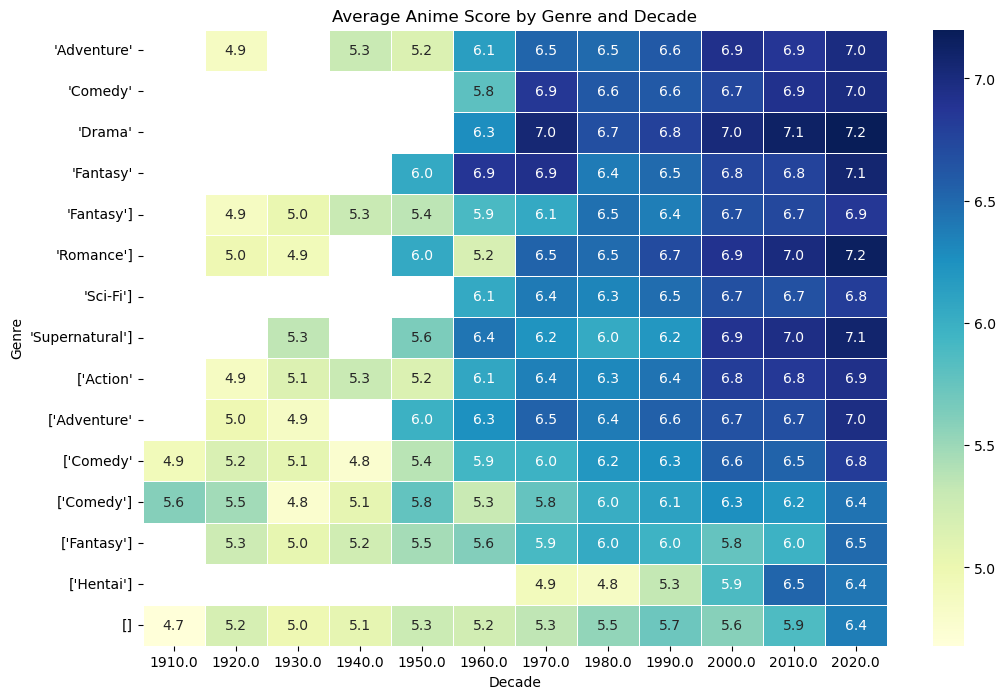

In [ ]:
# Select top 15 genres by total frequency to keep the chart readable
top_genres = anime_genres['genres'].value_counts().head(15).index

# Filter the genre dataframe
genre_trend = anime_genres[anime_genres['genres'].isin(top_genres)]

# Create a 'decade' column for aggregation
genre_trend['decade'] = (genre_trend['start_year'] // 10) * 10

# Pivot table: Index=Genres, Columns=Decade, Values=Mean Score
heatmap_data = genre_trend.pivot_table(index='genres', columns='decade', values='score', aggfunc='mean')

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=.5)
plt.title("Average Anime Score by Genre and Decade")
plt.xlabel("Decade")
plt.ylabel("Genre")
plt.show()

In [ ]:
#ALTERNATIVE
# --- PREPARATION ---
# 1. Clean and split studios (vectorized)
# Some anime have multiple studios "Studio A, Studio B". We take the primary one.
anime_studios = anime_clean.assign(primary_studio=anime_clean['studios'].str.split(',').str[0])
anime_studios = anime_studios[anime_studios['primary_studio'].notna()]
mask = anime_studios["primary_studio"].str.strip().ne("[]")
anime_studios = anime_studios[mask]

# 2. Aggregation: Count productions and calculate mean score
studio_stats = anime_studios.groupby('primary_studio').agg(
    production_count=('mal_id', 'count'),
    avg_score=('score', 'mean'),
    total_favorites=('favorites', 'sum')
).reset_index()

# Filter: Only keep studios with > 20 productions to avoid noise (1-hit wonders)
top_studios = studio_stats[studio_stats['production_count'] > 20]

# --- PLOT 1: TREEMAP (Market Share) ---
fig_tree = px.treemap(
    top_studios,
    path=[px.Constant("All Studios"), 'primary_studio'],
    values='production_count',
    color='avg_score',
    color_continuous_scale='RdBu', # Red = Bad, Blue = Good
    title='Studio Dominance: Box Size = Production Volume, Color = Average Score',
    hover_data=['avg_score']
)
fig_tree.update_layout(margin=dict(t=50, l=25, r=25, b=25))
fig_tree.show()

# --- PLOT 2: SCATTER (Quality vs Quantity) ---
# This answers: "Who is the 'Prestige' studio?"

top_studios = top_studios.copy()

# pick top 20 by favorites (change column if you want)
top20_idx = top_studios.nlargest(20, "total_favorites").index

top_studios["label"] = ""
top_studios.loc[top20_idx, "label"] = top_studios.loc[top20_idx, "primary_studio"]

fig_scatter = px.scatter(
    top_studios,
    x="production_count",
    y="avg_score",
    size="total_favorites",
    text="label",
    title="Studio Strategy: Quality (Y) vs. Quantity (X)",
    labels={
        "production_count": "Total Anime Produced",
        "avg_score": "Average Score"
    },
    height=600
)

fig_scatter.update_traces(
    mode="markers+text",
    textposition="top center",
    textfont=dict(size=12)
)

fig_scatter.show()


Checkin non-japanese voice acting languages

In [4]:
# --- PREPARATION ---
person_voice_works_df = pd.read_csv('datasets/person_voice_works_cleaned.csv')
# 1. Count distinct roles by language
lang_counts = person_voice_works_df['language'].value_counts().reset_index()
lang_counts.columns = ['language', 'role_count']

# 2. Separate Japanese (Dominant) from Others to make the chart readable
# Usually Japanese is 90%+, so we might want to view "Non-Japanese" specifically
non_jp = lang_counts[lang_counts['language'] != 'Japanese']

# --- PLOT ---
fig = px.bar(
    non_jp.head(10), # Top 10 non-Japanese languages
    x='role_count',
    y='language',
    orientation='h',
    title='Globalization of Anime: Top Non-Japanese Voice Acting Languages',
    color='role_count',
    color_continuous_scale='Viridis'
)
fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.show()

### TRYING A NEW Graph: Global MAP

In [28]:
# Count users per country
country_counts = profiles_df['location'].value_counts().reset_index()
country_counts.columns = ['location', 'User_Count']

# convert to ISO-3 to avoid annoying warnings in plotly
codes = px.data.gapminder()[["country", "iso_alpha"]].drop_duplicates()

country_counts = country_counts.merge(
    codes, left_on="location", right_on="country", how="left"
)

fig = px.choropleth(
    country_counts,
    locations="iso_alpha",
    locationmode="ISO-3",
    color="User_Count",
    hover_name="location",
    color_continuous_scale=px.colors.diverging.Portland,
    title="User Distribution by Extracted Location"
)

fig.show()

Separating japan won't make much difference in this graph.
We could chech wheter this map changes if we count the percentage of people watch anime compared to the whole population of the country

In [27]:
# 1. Count users per country (from your dataset)
country_counts = profiles_df['location'].value_counts().reset_index()
country_counts.columns = ['location', 'User_Count']

# 2. Get population + ISO-3 codes from gapminder
gap = px.data.gapminder()[['country', 'iso_alpha', 'year', 'pop']]

# take the latest year per country
gap_latest = gap.sort_values('year').drop_duplicates('country', keep='last')

# 3. Merge your counts with population data
country_counts = country_counts.merge(
    gap_latest,
    left_on='location',   # my country names
    right_on='country',   # gapminder country names
    how='left'
)

# 4. Compute users percentage
country_counts['users_percent'] = (
    country_counts['User_Count'] / country_counts['pop'] * 100
)

# 5. Plot: anime users normalized by population
fig = px.choropleth(
    country_counts,
    locations="iso_alpha",              # ISO-3 codes
    locationmode='ISO-3',
    color="users_percent",             # normalized metric
    hover_name="location",
    hover_data={
        "User_Count": True,
        "pop": True,
        "users_percent": ':.2f'
    },
    color_continuous_scale=px.colors.diverging.Portland,
    title='Anime Users per 100k Inhabitants by Country'
)
fig.show()


This way we can tell Australia becomes much more interesting